In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from google.colab import files

In [ ]:
c_lvl = pd.read_csv('https://raw.githubusercontent.com/Umerfarooq122/What-Is-The-Effect-Of-The-Earth-s-Temperature-on-Cyclonic-Storms-/main/sealevel.csv')

In [ ]:
c_lvl.head()

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21


In [ ]:
c_lvl.dtypes

Year                             int64
TotalWeightedObservations      float64
GMSL_noGIA                     float64
StdDevGMSL_noGIA               float64
SmoothedGSML_noGIA             float64
GMSL_GIA                       float64
StdDevGMSL_GIA                 float64
SmoothedGSML_GIA               float64
SmoothedGSML_GIA_sigremoved    float64
dtype: object

In [ ]:
 c_lvl = c_lvl[['Year','GMSL_GIA']]

In [ ]:
#c_lvl[['Years','Date','month']] = c_lvl.Year.apply(
  # lambda x: pd.Series(str(x).split("-")))

In [ ]:
c_lvl.tail()

,Year,GMSL_GIA
1043,2021,56.17
1044,2021,57.42
1045,2021,56.57
1046,2021,54.41
1047,2021,57.01


In [ ]:
c_lvl = c_lvl.loc[c_lvl['Year']>=1998]

In [ ]:
c_lvl['GMSL_GIA'] = c_lvl['GMSL_GIA']+23.25

In [ ]:
c_lvl.head()

,Year,GMSL_GIA
184,1998,0.00
185,1998,3.68
186,1998,-0.55
187,1998,2.29
188,1998,2.19


# New Section

# New Section

# New Section

In [ ]:
b = c_lvl.groupby('Year',  as_index=False, dropna=True)[['GMSL_GIA']].mean()

In [ ]:
b.tail()

,Year,GMSL_GIA
19,2017,67.595135
20,2018,71.860541
21,2019,78.995676
22,2020,79.669722
23,2021,80.151111


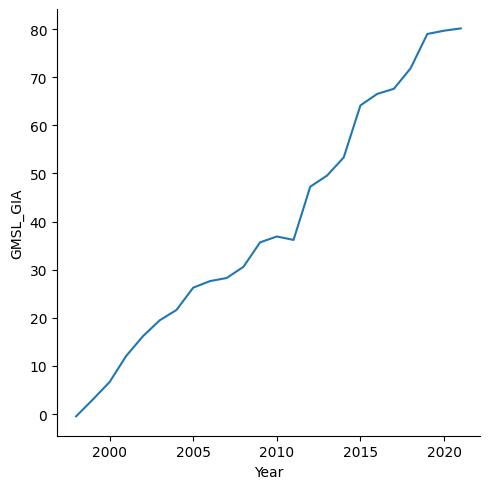

In [ ]:
sns.relplot(data =b, x = 'Year', y = 'GMSL_GIA', kind='line')

In [ ]:
b['GMSL_GIA'].mean()

39.96635228978979

In [ ]:

flood = pd.read_csv('https://raw.githubusercontent.com/Umerfarooq122/What-Is-The-Effect-Of-The-Earth-s-Temperature-on-Cyclonic-Storms-/main/flood%20data%20-%20compiled_pop_ghsl_ts_2019_08_04.csv')

In [ ]:
flood.head()

,index,country,year,month,day,area,exposed
0,1586,Australia,2000,2,18,317000000.0,38.298830
1,1587,Madagascar,2000,2,17,229000000.0,4594.561996
2,1587,Comoros,2000,2,17,0.0,0.000000
3,1595,Turkey,2000,4,5,0.0,0.000000
4,1595,Italy,2000,4,5,0.0,0.000000


In [ ]:
num_floods = flood.groupby(['year']).size().reset_index(name='counts')
num_floods['year'] = pd.to_datetime(num_floods.year, format='%Y')

In [ ]:
land_temp = pd.read_csv('https://raw.githubusercontent.com/Umerfarooq122/What-Is-The-Effect-Of-The-Earth-s-Temperature-on-Cyclonic-Storms-/main/Land%20Gloabal%20temperature.csv')

In [ ]:
land_temp['Year'] = pd.to_datetime(land_temp.Year, format='%Y')

(0.0, 550.0)

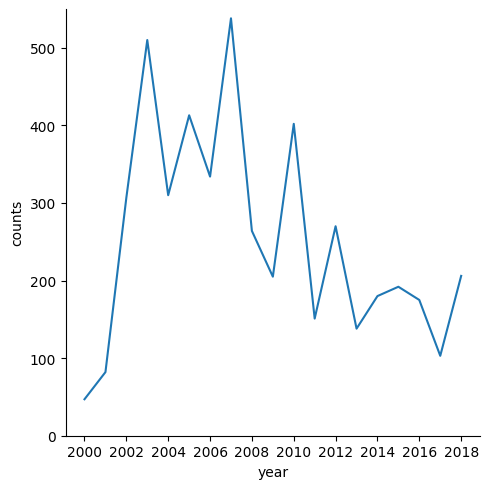

In [ ]:
sns.relplot(data = num_floods, x = 'year', y = 'counts', kind = 'line')
plt.ylim(0,550)

In [ ]:
temp = pd.read_csv('https://raw.githubusercontent.com/Umerfarooq122/What-Is-The-Effect-Of-The-Earth-s-Temperature-on-Cyclonic-Storms-/main/temperature%20(zonal).csv')
temp.head()

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.17,-0.30,-0.05,-0.40,-0.12,-0.02,-0.81,-0.52,-0.30,-0.14,-0.10,-0.04,0.05,0.67
1,1881,-0.09,-0.18,0.00,-0.37,0.11,-0.07,-0.92,-0.49,-0.21,0.11,0.11,-0.06,-0.07,0.60
2,1882,-0.11,-0.22,-0.01,-0.33,-0.04,0.01,-1.42,-0.31,-0.16,-0.04,-0.04,0.01,0.04,0.63
3,1883,-0.18,-0.30,-0.07,-0.37,-0.16,-0.01,-0.19,-0.59,-0.29,-0.17,-0.15,-0.04,0.07,0.50
4,1884,-0.29,-0.44,-0.15,-0.63,-0.14,-0.14,-1.31,-0.67,-0.49,-0.12,-0.16,-0.20,-0.02,0.65


In [ ]:
temperature = pd.read_csv('https://raw.githubusercontent.com/Umerfarooq122/What-Is-The-Effect-Of-The-Earth-s-Temperature-on-Cyclonic-Storms-/main/land%20Ocean%20Global%20temp.csv')

In [ ]:
temperature.head()

,Year,Glob
0,1998,0.58
1,1999,0.49
2,2000,0.34
3,2001,0.44
4,2002,0.68


In [ ]:
temperature['Abs'] = temperature['Glob'].cumsum()
temperature['Year'] = pd.to_datetime(temperature.Year, format='%Y')

In [ ]:
hurricane  = pd.read_csv('https://raw.githubusercontent.com/Umerfarooq122/What-Is-The-Effect-Of-The-Earth-s-Temperature-on-Cyclonic-Storms-/main/hurricanes%20data%20-%20Sheet1.csv')
hurricane = hurricane.loc[hurricane['Year ▾']> 1997]
hurricane = hurricane.rename(columns={"Year ▾": "Year"})
hurricane.tail()


,Year,Named Storms,Named Storm Days,Hurricanes,Hurricanes Days,Cat. 3+ Hurricanes,Cat. 3+ Hurricanes Days,Accumulated Cyclone Energy
38,2018,103,540.75,59,223.50,33,91.00,1108.4
39,2019,98,449.00,55,172.25,35,64.50,854.8
40,2020,104,380.25,46,115.25,24,35.50,599.1
41,2021,94,354.75,37,119.00,16,49.00,621.1
42,2022,87,335.75,40,115.25,17,36.25,559.6


In [ ]:
overall = pd.read_csv('https://raw.githubusercontent.com/Umerfarooq122/What-Is-The-Effect-Of-The-Earth-s-Temperature-on-Cyclonic-Storms-/main/Data%20-%20EM-DAT%20Data.csv')
overall.tail()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
17253,2023-0651-USA,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-11,2023-10-18
17254,2023-0652-VNM,No,tec-mis-fir-fir,Technological,Miscellaneous accident,Fire (Miscellaneous),Fire (Miscellaneous),NaN,Building,VNM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-10-12,2023-10-18
17255,2023-9167-HND,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,HND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{""adm1_code"":1420,""adm1_name"":""Atlantida""},{""...",2023-03-23,2023-09-26
17256,2023-9234-ESP,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,ESP,...,NaN,NaN,300000.0,NaN,2400000.0,NaN,NaN,"[{""adm1_code"":2716,""adm1_name"":""Andalucía""},{""...",2023-04-19,2023-09-26
17257,2023-9494-IDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,GLIDE:DR-2023-000154,NaN,IDN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{""adm1_code"":73617,""adm1_name"":""Papua""}]",2023-08-02,2023-09-26


In [ ]:
flood = overall.loc[overall['Disaster Type'] == 'Flood' ]
flood = flood.loc[flood['Disaster Group'] == 'Natural']


In [ ]:
flood = flood.rename(columns={"DisNo.": "Dis"})

In [ ]:
flood[['Year','code','location']] = flood.Dis.apply(
   lambda x: pd.Series(str(x).split("-")))

In [ ]:
flood.head()

,Dis,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update,Year,code,location
1,1997-0002-BRA,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,BRA,...,NaN,NaN,NaN,54.848454,NaN,2003-07-01,2023-09-25,1997,0002,BRA
7,1997-0008-USA,Yes,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,USA,...,NaN,1500000.0,2734808.0,54.848454,NaN,2006-07-10,2023-09-25,1997,0008,USA
15,1997-0015-AUS,Yes,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,AUS,...,NaN,NaN,NaN,54.848454,NaN,2003-07-01,2023-09-25,1997,0015,AUS
16,1997-0016-NZL,Yes,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,NZL,...,NaN,NaN,NaN,54.848454,NaN,2003-07-01,2023-09-25,1997,0016,NZL
22,1997-0022-BOL,Yes,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,BOL,...,NaN,35000.0,63812.0,54.848454,NaN,2006-07-10,2023-09-25,1997,0022,BOL


In [ ]:
flood_count = flood.groupby(['Year']).size().reset_index(name='counts')

In [ ]:
flood_count['Year'] = pd.to_datetime(flood_count.Year, format='%Y')

In [ ]:
flood_count

,Year,counts
0,1997-01-01,95
1,1998-01-01,94
2,1999-01-01,122
3,2000-01-01,157
4,2001-01-01,156
5,2002-01-01,171
6,2003-01-01,158
7,2004-01-01,128
8,2005-01-01,191
9,2006-01-01,226


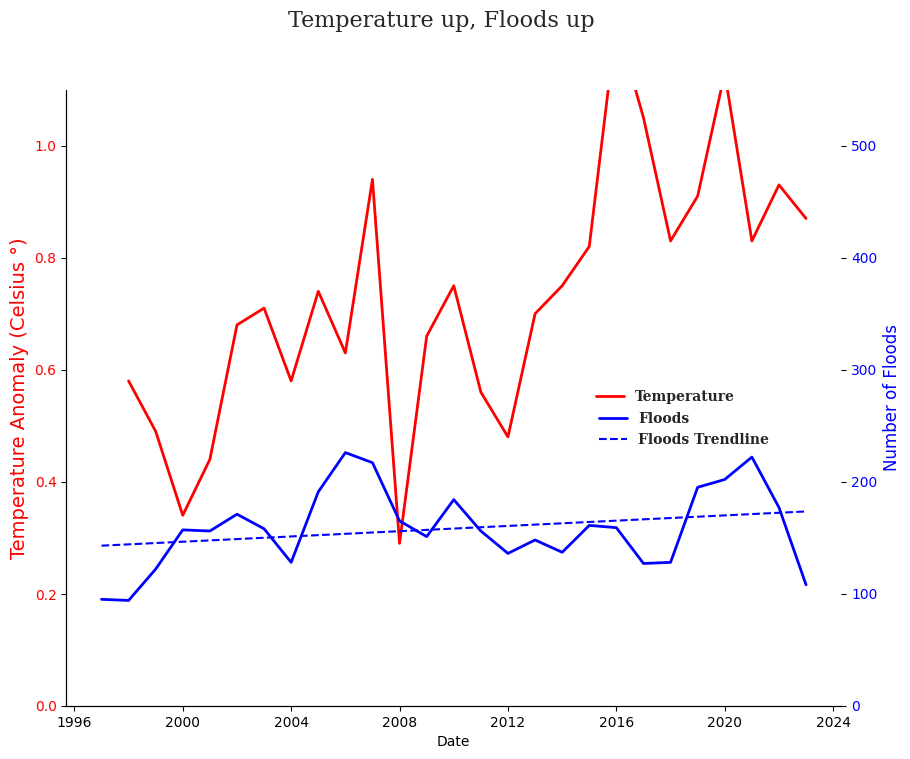

In [ ]:

fig, ax1 = plt.subplots(figsize=(10, 8))
ax2 = ax1.twinx()
sns.set_style("whitegrid", {'grid.linestyle': '--'})

ax1.plot(temperature['Year'], temperature['Glob'], color='red', lw=2, label = 'Temperature')
ax2.plot(flood_count['Year'], flood_count['counts'], color='blue', lw=2, label = 'Floods')

ax1.set_xlabel("Date")
ax1.set_ylabel("Temperature Anomaly (Celsius °)", color='red', fontsize=14)
ax1.tick_params(axis="y", labelcolor='red')

ax1.set_ylim(0,1.1)
ax2.set_ylabel("Number of Floods", color='blue', fontsize=12)
ax2.tick_params(axis="y", labelcolor='blue')
plt.ylim(0,550)

x = flood_count['Year']
x_num = dates.date2num(x)
trend = np.polyfit(x_num, flood_count['counts'], 1)
fit = np.poly1d(trend)
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "b--", label = 'Floods Trendline')


fig.suptitle("Temperature up, Floods up", fontsize=16, font = 'serif')
#fig.autofmt_xdate()
sns.despine(bottom = False, left = False)

ax1.legend(bbox_to_anchor=(.879,.47),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
ax2.legend(bbox_to_anchor=(.923,.4),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)

plt.show()

In [ ]:

flood_affectes = flood.groupby(['Year'])['Total Affected','No. Injured','Total Deaths'].mean()


<ipython-input-35-c705ca346bb2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  flood_affectes = flood.groupby(['Year'])['Total Affected','No. Injured','Total Deaths'].mean()


In [ ]:
flood_affectes = flood_affectes.reset_index()

In [ ]:
flood_affectes['Year'] = pd.to_datetime(flood_affectes.Year, format='%Y')

In [ ]:
flood_affectes.head()

,Year,Total Affected,No. Injured,Total Deaths
0,1997-01-01,6.566574e+05,2424.166667,106.736111
1,1998-01-01,3.454855e+06,10330.083333,159.000000
2,1999-01-01,1.331126e+06,1063.107143,400.080460
3,2000-01-01,5.278924e+05,55.888889,55.787037
4,2001-01-01,2.399063e+05,158.933333,49.316832


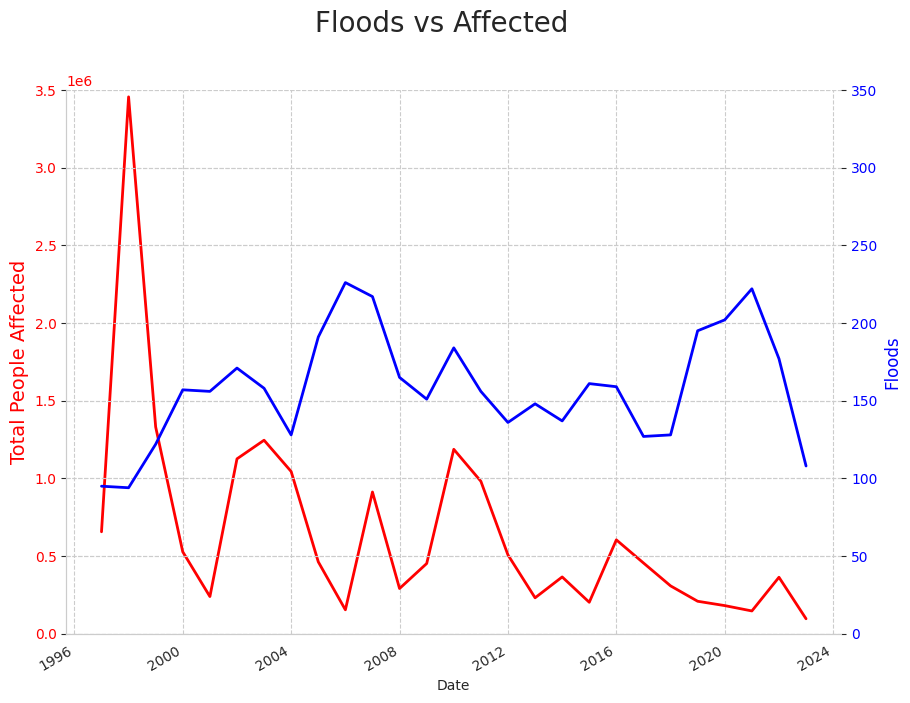

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 8))
ax2 = ax1.twinx()
sns.set_style("whitegrid", {'grid.linestyle': '--'})

ax1.plot(flood_affectes['Year'], flood_affectes['Total Affected'], color='red', lw=2)
ax2.plot(flood_count['Year'], flood_count['counts'], color='blue', lw=2)

ax1.set_xlabel("Date")
ax1.set_ylabel("Total People Affected", color='red', fontsize=14)
ax1.tick_params(axis="y", labelcolor='red')
ax1.set_ylim(0,3500000)
ax2.set_ylabel("Floods", color='blue', fontsize=12)
ax2.tick_params(axis="y", labelcolor='blue')
ax2.set_ylim(0,350)
fig.suptitle(" Floods vs Affected ", fontsize=20)
fig.autofmt_xdate()
sns.despine(bottom = False, left = False)

plt.show()

In [ ]:
storms = overall.loc[overall['Disaster Type'] == 'Storm']


In [ ]:
storms.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
12,1997-0013-MDG,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Gretelle,MDG,...,NaN,NaN,NaN,NaN,50000.0,91160.0,54.848454,NaN,2007-05-06,2023-09-25
13,1997-0013-MOZ,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Gretelle,MOZ,...,NaN,NaN,NaN,NaN,50.0,91.0,54.848454,NaN,2007-05-06,2023-09-25
20,1997-0020-MDG,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Josie,MDG,...,NaN,NaN,NaN,NaN,NaN,NaN,54.848454,NaN,2003-07-01,2023-09-25
32,1997-0034-USA,Yes,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,NaN,NaN,USA,...,NaN,NaN,200500.0,365553.0,500000.0,911603.0,54.848454,NaN,2006-07-10,2023-09-25
35,1997-0037-NZL,Yes,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,Drena,NZL,...,NaN,NaN,NaN,NaN,NaN,NaN,54.848454,NaN,2003-07-01,2023-09-25


In [ ]:
storms = storms.rename(columns={"DisNo.": "Dis"})

In [ ]:
storms[['Year','code','location']] = storms.Dis.apply(
   lambda x: pd.Series(str(x).split("-")))

In [ ]:
storm_count = storms.groupby(['Year']).size().reset_index(name='counts')

In [ ]:
storm_count['Year'] = pd.to_datetime(storm_count.Year, format='%Y')

In [ ]:
hurricane['Year'] = pd.to_datetime(hurricane.Year, format='%Y')

In [ ]:
hurricane.head()

,Year,Named Storms,Named Storm Days,Hurricanes,Hurricanes Days,Cat. 3+ Hurricanes,Cat. 3+ Hurricanes Days,Accumulated Cyclone Energy
18,1998-01-01,89,418.5,50,179.25,21,46.00,773.1
19,1999-01-01,74,317.5,39,135.50,21,46.50,606.4
20,2000-01-01,90,392.5,45,160.50,20,39.25,677.3
21,2001-01-01,88,373.5,51,162.75,24,38.50,672.4
22,2002-01-01,82,384.5,41,171.50,27,69.50,812.0


In [ ]:
hurricane['adjusted'] = hurricane['Accumulated Cyclone Energy']/(hurricane['Named Storms']+hurricane['Hurricanes']+hurricane['Cat. 3+ Hurricanes'])

In [ ]:
ocean_temp = pd.read_csv('https://raw.githubusercontent.com/Umerfarooq122/What-Is-The-Effect-Of-The-Earth-s-Temperature-on-Cyclonic-Storms-/main/Global%20Ocean%20Temperature.csv')

In [ ]:
ocean_temp['Year'] = pd.to_datetime(ocean_temp.Year, format='%Y')

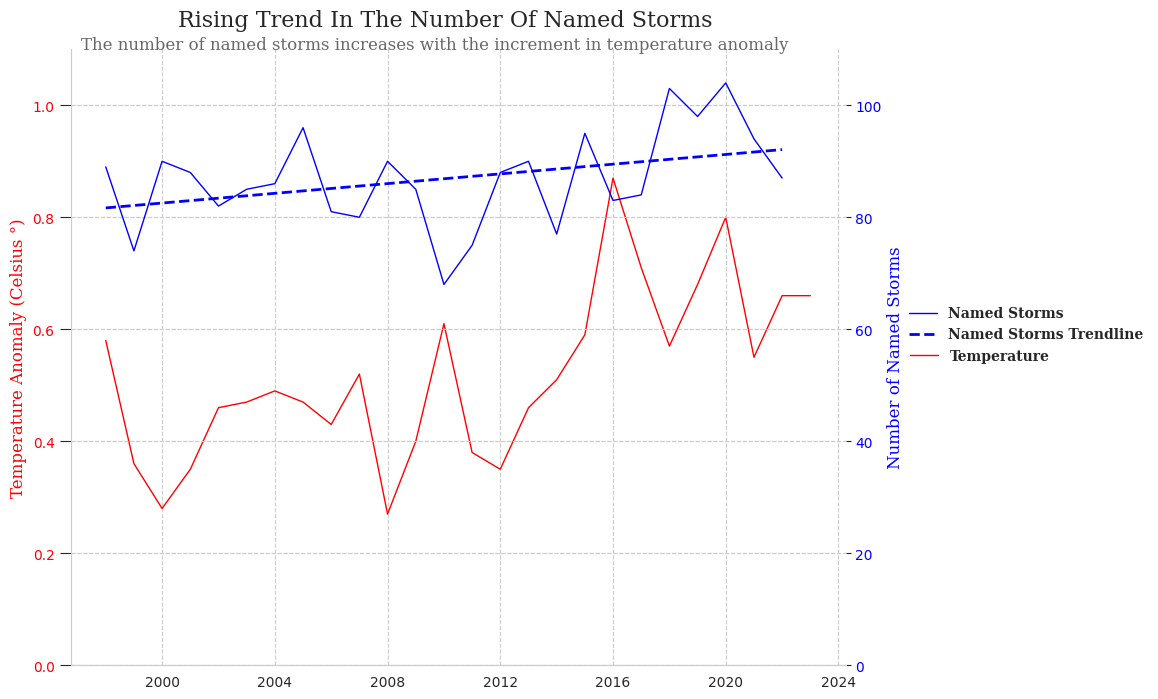

In [101]:
fig, ax1 = plt.subplots(figsize=(10, 8))
ax2 = ax1.twinx()
sns.set_style("whitegrid", {'grid.linestyle': '--'})


ax2.plot(hurricane['Year'], hurricane['Named Storms'], color='blue', alpha = 1, lw=1, label = 'Named Storms')
x = hurricane['Year']
x_num = dates.date2num(x)
trend = np.polyfit(x_num, hurricane['Named Storms'], 1)
fit = np.poly1d(trend)
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "b--", label = 'Named Storms Trendline', lw = 2)
#ax2.plot(hurricane['Year'], hurricane['Hurricanes'], color='blue', alpha = .3,lw=1, label = 'Hurricanes')
ax1.plot(ocean_temp['Year'], ocean_temp['Temperature'], color='red', lw=1, label = 'Temperature')
#ax2.plot(hurricane['Year'], hurricane['Cat. 3+ Hurricanes'], color='black',alpha = .3, lw=1, label = 'Category 3+ Hurricanes')
plt.xticks(font = 'serif')



ax1.set_ylabel("Temperature Anomaly (Celsius °)", color='red', fontsize=12, fontdict={'font':'serif'})
ax1.tick_params(axis="y", labelcolor='red', size = 8)
ax1.set_ylim(0,1.1)
ax2.set_ylabel("Number of Named Storms", color='blue', fontsize=12, fontdict={'font':'serif'})
ax2.tick_params(axis="y", labelcolor='blue')
ax2.set_ylim(0,110)
fig.suptitle("", fontsize=20)
#fig.autofmt_xdate()

ax2.legend(bbox_to_anchor=(1.4,.505),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
ax1.legend(bbox_to_anchor=(1.279,.47),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
sns.despine(bottom = False, left = False)
fig.suptitle("Rising Trend In The Number Of Named Storms", fontsize=16, font = 'serif', y = .93)
ax1.text(9900,1.1,"The number of named storms increases with the increment in temperature anomaly",
        fontdict={ 'size':12,'family':'serif'}, alpha = .7)



plt.show()

In [ ]:
cause1 = ocean_temp.loc[ocean_temp['Year']>='2000-01-01' ]
cause1 = cause1.loc[ocean_temp['Year']<='2004-01-01']
cause2 = ocean_temp.loc[ocean_temp['Year']>='2010-01-01' ]
cause2 = cause2.loc[cause2['Year']<='2012-01-01']

effect1 = hurricane.loc[hurricane['Year']>='2002-01-01' ]
effect1 = effect1.loc[effect1['Year']<='2005-01-01' ]
effect2 = hurricane.loc[hurricane['Year']>='2012-01-01' ]
effect2 = effect2.loc[effect2['Year']<='2014-01-01' ]

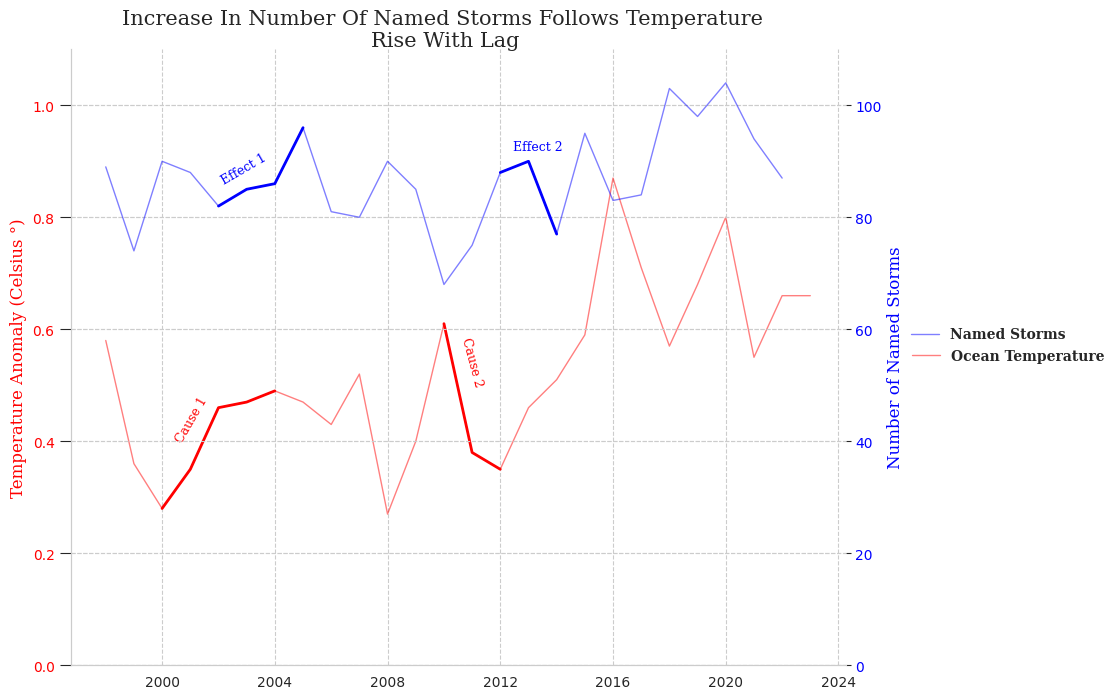

In [102]:
fig, ax1 = plt.subplots(figsize=(10, 8))
ax2 = ax1.twinx()
sns.set_style("whitegrid", {'grid.linestyle': '--'})


ax2.plot(hurricane['Year'], hurricane['Named Storms'], color='blue', alpha = .5, lw=1, label = 'Named Storms')
ax2.plot(effect1['Year'], effect1['Named Storms'], color='blue', alpha = 1, lw=2)
ax2.plot(effect2['Year'], effect2['Named Storms'], color='blue', alpha = 1, lw=2)
'''
x = hurricane['Year']
x_num = dates.date2num(x)
trend = np.polyfit(x_num, hurricane['Named Storms'], 1)
fit = np.poly1d(trend)
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "g--", label = 'Named Storms Trendline', lw = 2)
'''
#ax2.plot(hurricane['Year'], hurricane['Hurricanes'], color='blue', alpha = .3,lw=1, label = 'Hurricanes')
ax1.plot(ocean_temp['Year'], ocean_temp['Temperature'], color='red', lw=1, alpha = .5, label = 'Ocean Temperature')
ax1.plot(cause1['Year'], cause1['Temperature'], color='red', lw=2)
ax1.plot(cause2['Year'], cause2['Temperature'], color='red', lw=2)
#ax2.plot(hurricane['Year'], hurricane['Cat. 3+ Hurricanes'], color='black',alpha = .3, lw=1, label = 'Category 3+ Hurricanes')
plt.xticks(font = 'serif')



ax1.set_ylabel("Temperature Anomaly (Celsius °)", color='red', fontsize=12, fontdict={'font':'serif'})
ax1.tick_params(axis="y", labelcolor='red', size = 8)
ax1.set_ylim(0,1.1)
ax2.set_ylabel("Number of Named Storms", color='blue', fontsize=12, fontdict={'font':'serif'})
ax2.tick_params(axis="y", labelcolor='blue')
ax2.set_ylim(0,110)

#fig.autofmt_xdate()

ax2.legend(bbox_to_anchor=(1.3,.505),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
ax1.legend(bbox_to_anchor=(1.35,.47),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
sns.despine(bottom = False, left = False)
fig.suptitle("Increase In Number Of Named Storms Follows Temperature \nRise With Lag", fontsize=15, font = 'serif', y = .93)
#ax1.text(9900,1.1,"A lag can be observed between the temperature rise and named storms",
       # fontdict={ 'size':12,'family':'serif', 'color':'gray'})
ax1.text(11100,.4,"Cause 1",fontdict={ 'size':10,'family':'serif', 'color':'red'}, rotation=60, size=9)
ax1.text(11700,.86,"Effect 1",fontdict={ 'size':10,'family':'serif', 'color':'blue'}, rotation=30, size=9)
ax1.text(14800,.5,"Cause 2",fontdict={ 'size':10,'family':'serif', 'color':'red'}, rotation=285, size=9)
ax1.text(15500,.92,"Effect 2",fontdict={ 'size':10,'family':'serif', 'color':'blue'}, rotation=0, size=9)



plt.show()

In [ ]:
cause1.head()

,Year,Temperature
2,2000-01-01,0.28
3,2001-01-01,0.35
4,2002-01-01,0.46
5,2003-01-01,0.47
6,2004-01-01,0.49


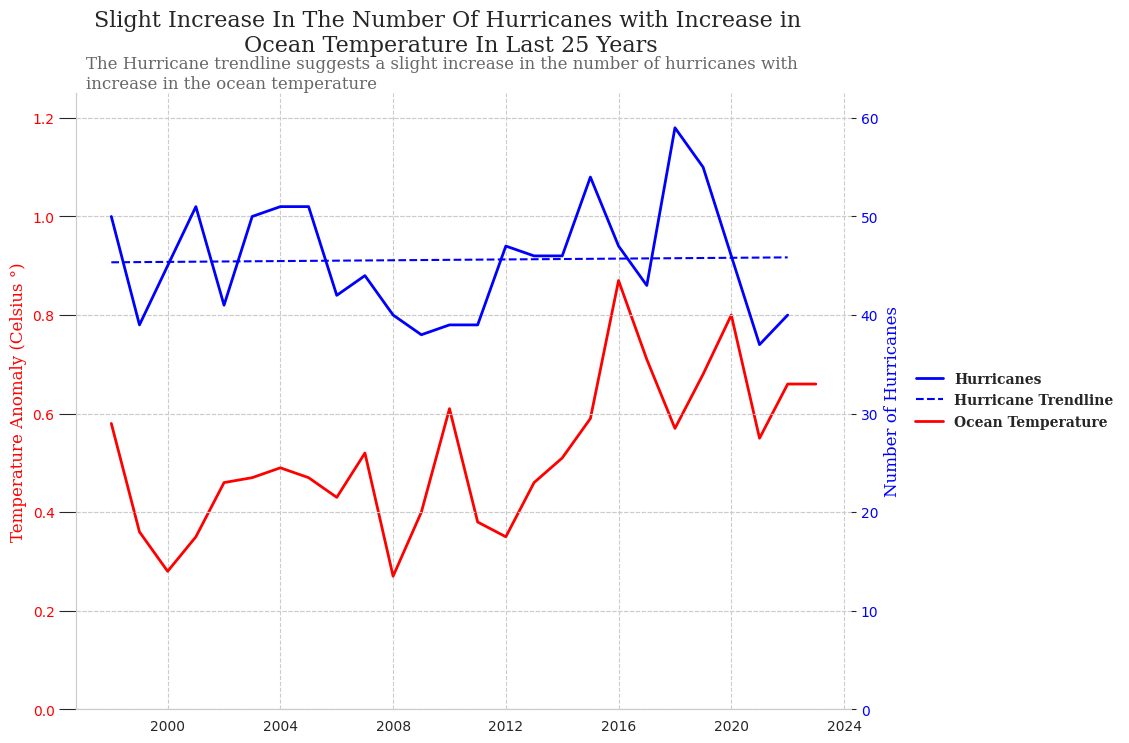

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 8))
ax2 = ax1.twinx()
#sns.set_style("whitegrid", {'grid.linestyle': '--'})

ax1.plot(ocean_temp['Year'], ocean_temp['Temperature'], color='red', lw=2, label = 'Ocean Temperature')
#ax2.plot(hurricane['Year'], hurricane['Named Storms'], color='green', lw=2, label = 'Named Storms')
ax2.plot(hurricane['Year'], hurricane['Hurricanes'], color='blue', alpha = 1,lw=2, label = 'Hurricanes')
x = hurricane['Year']
x_num = dates.date2num(x)
trend = np.polyfit(x_num, hurricane['Hurricanes'], 1)
fit = np.poly1d(trend)
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "b--", label = 'Hurricane Trendline')


#ax2.plot(hurricane['Year'], hurricane['Cat. 3+ Hurricanes'], color='black',alpha = .3, lw=1, label = 'Category 3+ Hurricanes')
plt.xticks(font = 'serif')



ax1.set_ylabel("Temperature Anomaly (Celsius °)", color='red', fontsize=12, fontdict={'font':'serif'})
ax1.tick_params(axis="y", labelcolor='red', size = 12)
ax1.set_ylim(0,1.25)
ax2.set_ylabel("Number of Hurricanes", color='blue', fontsize=12, fontdict={'font':'serif'})
ax2.tick_params(axis="y", labelcolor='blue')
ax2.set_ylim(0,62.5)
fig.suptitle("", fontsize=20)
#fig.autofmt_xdate()
ax1.legend(bbox_to_anchor=(1.347,.435),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
ax2.legend(bbox_to_anchor=(1.355,.47),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
sns.despine(bottom = False, left = False)
fig.suptitle("Slight Increase In The Number Of Hurricanes with Increase in \nOcean Temperature In Last 25 Years", fontsize=16, font = 'serif', y = .985)
ax1.text(9900,1.26,"The Hurricane trendline suggests a slight increase in the number of hurricanes with \nincrease in the ocean temperature",
        fontdict={ 'size':12,'family':'serif'}, alpha = .7)
plt.show()

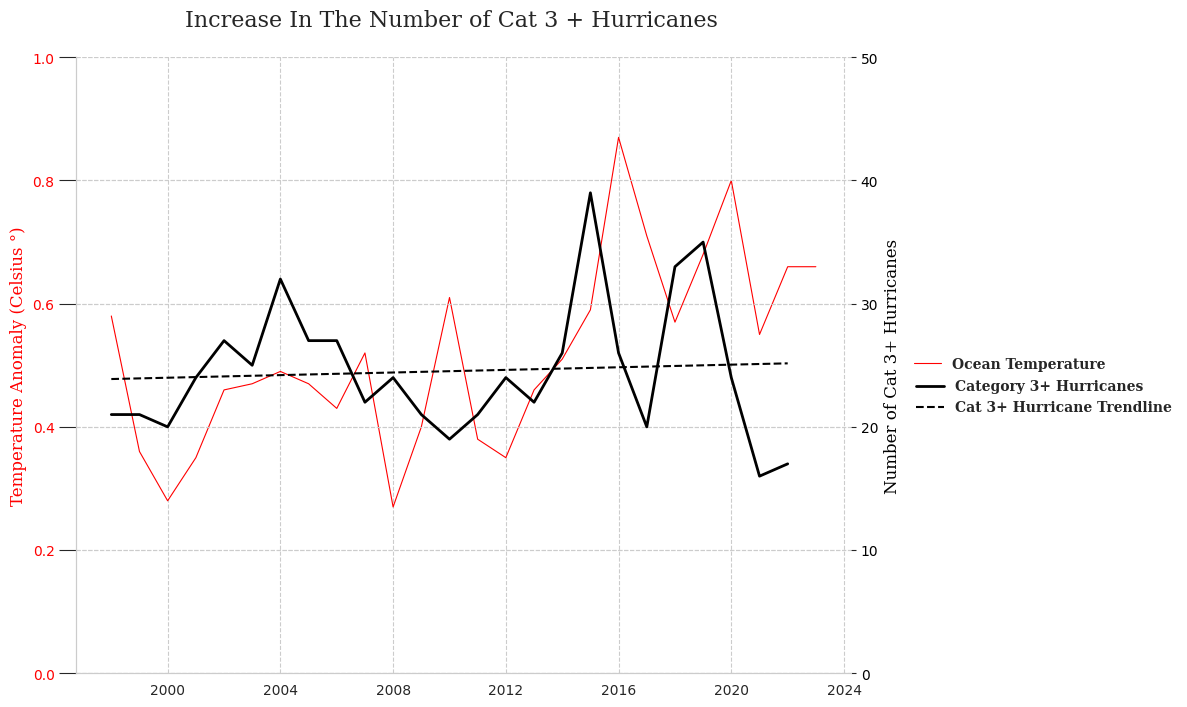

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 8))
ax2 = ax1.twinx()
#sns.set_style("whitegrid", {'grid.linestyle': '--'})

ax1.plot(ocean_temp['Year'], ocean_temp['Temperature'], color='red', lw=.8, label = 'Ocean Temperature')
#ax2.plot(hurricane['Year'], hurricane['Named Storms'], color='green', lw=2, label = 'Named Storms')
#ax2.plot(hurricane['Year'], hurricane['Hurricanes'], color='blue', alpha = 1,lw=2, label = 'Hurricanes')



ax2.plot(hurricane['Year'], hurricane['Cat. 3+ Hurricanes'], color='black',alpha = 1, lw=2, label = 'Category 3+ Hurricanes')
plt.xticks(font = 'serif')

x = hurricane['Year']
x_num = dates.date2num(x)
trend = np.polyfit(x_num, hurricane['Cat. 3+ Hurricanes'], 1)
fit = np.poly1d(trend)
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "k--", label = 'Cat 3+ Hurricane Trendline')


ax1.set_ylabel("Temperature Anomaly (Celsius °)", color='red', fontsize=12, fontdict={'font':'serif'})
ax1.tick_params(axis="y", labelcolor='red', size = 12)
ax1.set_ylim(0,1)
ax2.set_ylabel("Number of Cat 3+ Hurricanes", color='black', fontsize=12, fontdict={'font':'serif'})
ax2.tick_params(axis="y", labelcolor='black')
ax2.set_ylim(0,50)
fig.suptitle("", fontsize=20)
#fig.autofmt_xdate()
ax1.legend(bbox_to_anchor=(1.345,.47),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
ax2.legend(bbox_to_anchor=(1.43,.4),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
sns.despine(bottom = False, left = False)
fig.suptitle("Increase In The Number of Cat 3 + Hurricanes", fontsize=16, font = 'serif', y = .94)
#ax1.text(9900,1.12,"The number of named storms increases with the increment in temperature anomaly with a lag",
       # fontdict={ 'size':12,'family':'serif'}, alpha = .7)
plt.show()

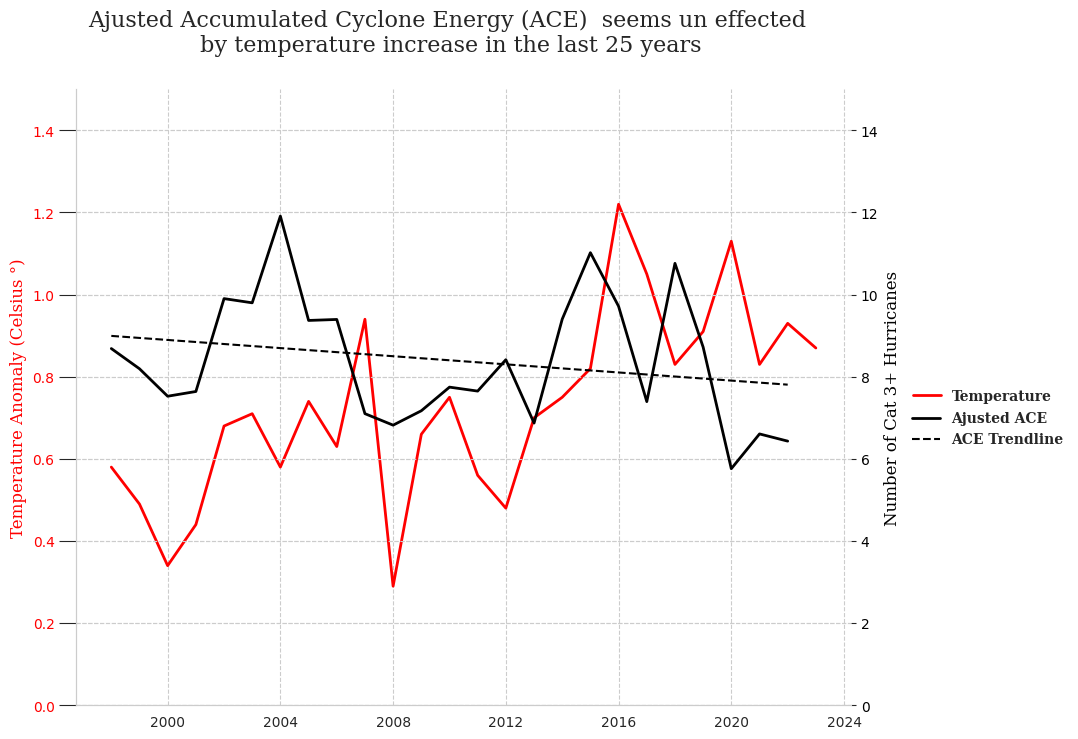

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 8))
ax2 = ax1.twinx()
#sns.set_style("whitegrid", {'grid.linestyle': '--'})

ax1.plot(temperature['Year'], temperature['Glob'], color='red', lw=2, label = 'Temperature')
#ax2.plot(hurricane['Year'], hurricane['Named Storms'], color='green', lw=2, label = 'Named Storms')
#ax2.plot(hurricane['Year'], hurricane['Hurricanes'], color='blue', alpha = 1,lw=2, label = 'Hurricanes')



ax2.plot(hurricane['Year'], hurricane['adjusted'], color='black',alpha = 1, lw=2, label = 'Ajusted ACE')
plt.xticks(font = 'serif')

x = hurricane['Year']
x_num = dates.date2num(x)
trend = np.polyfit(x_num, hurricane['adjusted'], 1)
fit = np.poly1d(trend)
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "k--", label = 'ACE Trendline')


ax1.set_ylabel("Temperature Anomaly (Celsius °)", color='red', fontsize=12, fontdict={'font':'serif'})
ax1.tick_params(axis="y", labelcolor='red', size = 12)
ax1.set_ylim(0,1.5)
ax2.set_ylabel("Number of Cat 3+ Hurricanes", color='black', fontsize=12, fontdict={'font':'serif'})
ax2.tick_params(axis="y", labelcolor='black')
ax2.set_ylim(0,15)
fig.suptitle("", fontsize=20)
#fig.autofmt_xdate()
ax1.legend(bbox_to_anchor=(1.275,.47),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
ax2.legend(bbox_to_anchor=(1.29,.4),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
sns.despine(bottom = False, left = False)
fig.suptitle("Ajusted Accumulated Cyclone Energy (ACE)  seems un effected \nby temperature increase in the last 25 years", fontsize=16, font = 'serif', y = .98)
#ax1.text(9900,1.1,"The number of named storms increases with the increment in temperature anomaly with a lag",
       # fontdict={ 'size':12,'family':'serif'}, alpha = .7)
plt.show()

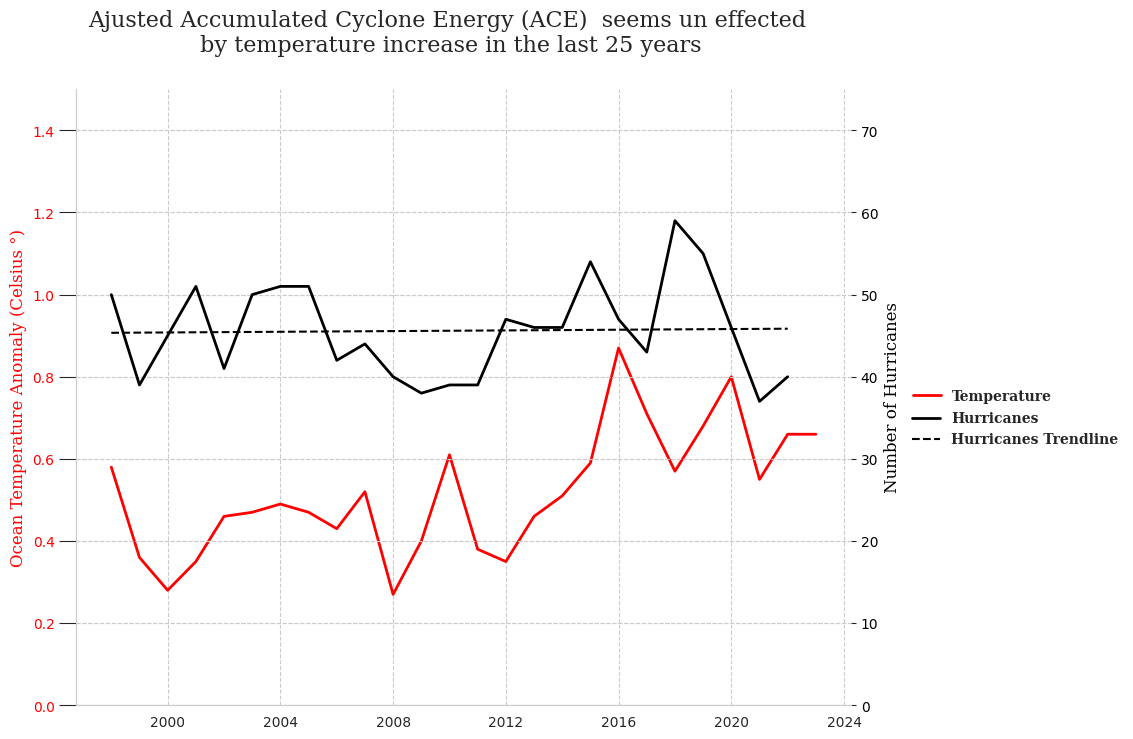

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 8))
ax2 = ax1.twinx()
#sns.set_style("whitegrid", {'grid.linestyle': '--'})

ax1.plot(ocean_temp['Year'], ocean_temp['Temperature'], color='red', lw=2, label = 'Temperature')
#ax2.plot(hurricane['Year'], hurricane['Named Storms'], color='green', lw=2, label = 'Named Storms')
#ax2.plot(hurricane['Year'], hurricane['Hurricanes'], color='blue', alpha = 1,lw=2, label = 'Hurricanes')



ax2.plot(hurricane['Year'], hurricane['Hurricanes'], color='black',alpha = 1, lw=2, label = 'Hurricanes')
plt.xticks(font = 'serif')

x = hurricane['Year']
x_num = dates.date2num(x)
trend = np.polyfit(x_num, hurricane['Hurricanes'], 1)
fit = np.poly1d(trend)
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "k--", label = 'Hurricanes Trendline')


ax1.set_ylabel("Ocean Temperature Anomaly (Celsius °)", color='red', fontsize=12, fontdict={'font':'serif'})
ax1.tick_params(axis="y", labelcolor='red', size = 12)
ax1.set_ylim(0,1.5)
ax2.set_ylabel("Number of Hurricanes", color='black', fontsize=12, fontdict={'font':'serif'})
ax2.tick_params(axis="y", labelcolor='black')
ax2.set_ylim(0,75)
fig.suptitle("", fontsize=20)
#fig.autofmt_xdate()
ax1.legend(bbox_to_anchor=(1.275,.47),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
ax2.legend(bbox_to_anchor=(1.361,.4),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
sns.despine(bottom = False, left = False)
fig.suptitle("Ajusted Accumulated Cyclone Energy (ACE)  seems un effected \nby temperature increase in the last 25 years", fontsize=16, font = 'serif', y = .98)
#ax1.text(9900,1.1,"The number of named storms increases with the increment in temperature anomaly with a lag",
       # fontdict={ 'size':12,'family':'serif'}, alpha = .7)
plt.show()

In [ ]:
wildfire = overall.loc[overall['Disaster Type'] == 'Wildfire']

In [ ]:
wildfire.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
52,1997-0078-CHL,Yes,nat-cli-wil-for,Natural,Climatological,Wildfire,Forest fire,NaN,NaN,CHL,...,NaN,NaN,NaN,NaN,NaN,NaN,54.848454,NaN,2003-07-01,2023-09-25
78,1997-0119-CAN,Yes,nat-cli-wil-for,Natural,Climatological,Wildfire,Forest fire,NaN,NaN,CAN,...,NaN,NaN,NaN,NaN,NaN,NaN,54.848454,NaN,2003-07-01,2023-09-25
118,1997-0157-HRV,Yes,nat-cli-wil-for,Natural,Climatological,Wildfire,Forest fire,NaN,NaN,HRV,...,NaN,NaN,NaN,NaN,NaN,NaN,54.848454,NaN,2003-07-01,2023-09-25
120,1997-0159-FRA,Yes,nat-cli-wil-for,Natural,Climatological,Wildfire,Forest fire,NaN,NaN,FRA,...,NaN,NaN,NaN,NaN,NaN,NaN,54.848454,NaN,2003-07-01,2023-09-25
135,1997-0174-USA,Yes,nat-cli-wil-for,Natural,Climatological,Wildfire,Forest fire,NaN,NaN,USA,...,NaN,NaN,NaN,NaN,2500.0,4558.0,54.848454,NaN,2003-07-01,2023-09-25


In [ ]:
wildfire = wildfire.rename(columns={"DisNo.": "Dis"})

In [ ]:
wildfire[['Year','code','location']] = wildfire.Dis.apply(
   lambda x: pd.Series(str(x).split("-")))

In [ ]:
wildfire = wildfire.groupby(['Year']).size().reset_index(name='counts')

In [ ]:
wildfire['Year'] = pd.to_datetime(wildfire.Year, format='%Y')

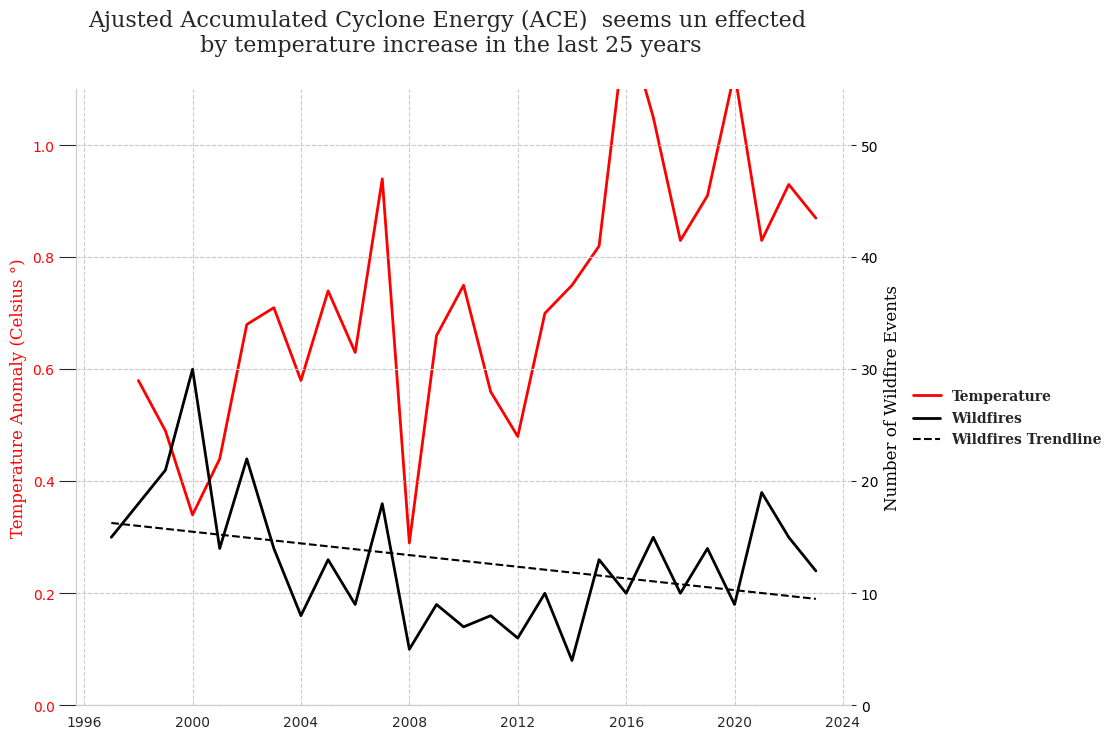

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 8))
ax2 = ax1.twinx()
#sns.set_style("whitegrid", {'grid.linestyle': '--'})

ax1.plot(temperature['Year'], temperature['Glob'], color='red', lw=2, label = 'Temperature')
ax2.plot(wildfire['Year'], wildfire['counts'], color='black',alpha = 1, lw=2, label = 'Wildfires')
plt.xticks(font = 'serif')

x = wildfire['Year']
x_num = dates.date2num(x)
trend = np.polyfit(x_num, wildfire['counts'], 1)
fit = np.poly1d(trend)
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "k--", label = 'Wildfires Trendline')


ax1.set_ylabel("Temperature Anomaly (Celsius °)", color='red', fontsize=12, fontdict={'font':'serif'})
ax1.tick_params(axis="y", labelcolor='red', size = 12)
ax1.set_ylim(0,1.1)
ax2.set_ylabel("Number of Wildfire Events", color='black', fontsize=12, fontdict={'font':'serif'})
ax2.tick_params(axis="y", labelcolor='black')
ax2.set_ylim(0,55)
fig.suptitle("", fontsize=20)
#fig.autofmt_xdate()
ax1.legend(bbox_to_anchor=(1.275,.47),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
ax2.legend(bbox_to_anchor=(1.34,.4),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
sns.despine(bottom = False, left = False)
fig.suptitle("Ajusted Accumulated Cyclone Energy (ACE)  seems un effected \nby temperature increase in the last 25 years", fontsize=16, font = 'serif', y = .98)
#ax1.text(9900,1.1,"The number of named storms increases with the increment in temperature anomaly with a lag",
       # fontdict={ 'size':12,'family':'serif'}, alpha = .7)
plt.show()

In [ ]:
tornado = storms.loc[storms['Disaster Subtype'] == 'Tropical cyclone']

In [ ]:
tornado.head()

,Dis,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update,Year,code,location
12,1997-0013-MDG,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Gretelle,MDG,...,NaN,50000.0,91160.0,54.848454,NaN,2007-05-06,2023-09-25,1997,0013,MDG
13,1997-0013-MOZ,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Gretelle,MOZ,...,NaN,50.0,91.0,54.848454,NaN,2007-05-06,2023-09-25,1997,0013,MOZ
20,1997-0020-MDG,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Josie,MDG,...,NaN,NaN,NaN,54.848454,NaN,2003-07-01,2023-09-25,1997,0020,MDG
37,1997-0039-FJI,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Gavin,FJI,...,NaN,27000.0,49227.0,54.848454,NaN,2003-07-01,2023-09-25,1997,0039,FJI
59,1997-0093-PNG,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Justin,PNG,...,NaN,NaN,NaN,54.848454,NaN,2003-07-01,2023-09-25,1997,0093,PNG


In [ ]:
seasonal_tornado = tornado.loc[tornado['Start Month'] >= 6 ]#& tornado['Start Month'] <= 11 ]

In [ ]:
seasonal_tornado = seasonal_tornado.loc[seasonal_tornado['Start Month'] <= 11 ]

In [ ]:
tornado_sea_count = seasonal_tornado.groupby(['Year']).size().reset_index(name='counts')

In [ ]:
tornado_sea_count.head()

,Year,counts
0,1997,27
1,1998,36
2,1999,32
3,2000,28
4,2001,36


In [ ]:
tornado_sea_count['Year'] = pd.to_datetime(tornado_sea_count.Year, format='%Y')

<Figure size 1000x800 with 0 Axes>

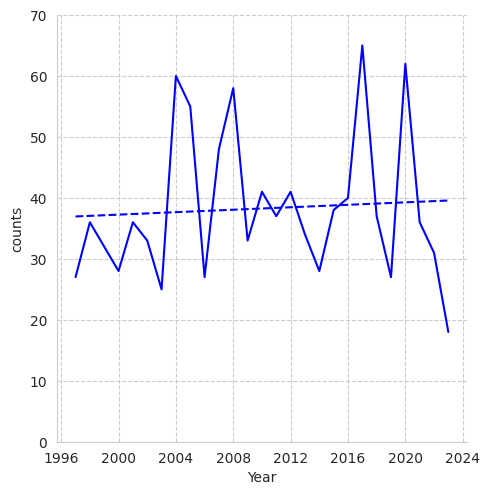

In [ ]:
plt.figure(figsize=(10,8))
sns.relplot(data= tornado_sea_count, x = 'Year', y = 'counts', kind = 'line', color = 'blue')
#plt.xticks(rotation = 90)
plt.ylim(0,70)

x = tornado_sea_count['Year']
x_num = dates.date2num(x)
trend = np.polyfit(x_num, tornado_sea_count['counts'], 1)
fit = np.poly1d(trend)
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "b--", label = 'Seasonal comparison')

plt.show()

In [ ]:
tornado['Year'] = pd.to_datetime(tornado.Year, format='%Y')

<ipython-input-74-23813a792989>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tornado['Year'] = pd.to_datetime(tornado.Year, format='%Y')


In [ ]:
tornado_cu = tornado.groupby(['Year']).size().reset_index(name='counts')

In [ ]:
tornado_cu.head()

,Year,counts
0,1997-01-01,37
1,1998-01-01,42
2,1999-01-01,40
3,2000-01-01,40
4,2001-01-01,46


In [ ]:
emmision = pd.read_csv('https://raw.githubusercontent.com/Umerfarooq122/What-Is-The-Effect-Of-The-Earth-s-Temperature-on-Cyclonic-Storms-/main/carbon%20emmision%20in%20tons%20-%20Data.csv')

In [ ]:
co2 = emmision.loc[emmision['Year']>=1998]

In [ ]:
co2.tail()

,Year,btons
78,2018,36.83
79,2019,37.08
80,2020,35.26
81,2021,37.12
82,2022,37.49


In [ ]:
co2['Year'] = pd.to_datetime(co2.Year, format='%Y')

<ipython-input-80-7886927d8a02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2['Year'] = pd.to_datetime(co2.Year, format='%Y')


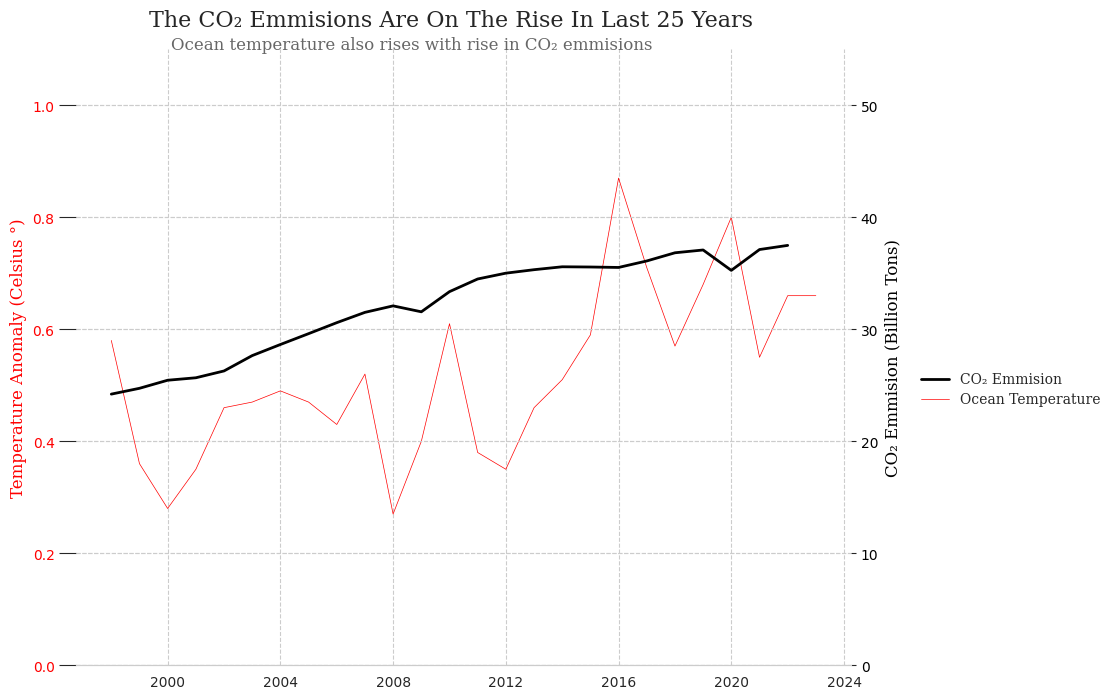

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 8))
ax2 = ax1.twinx()
#sns.set_style("whitegrid", {'grid.linestyle': '--'})

ax1.plot(ocean_temp['Year'], ocean_temp['Temperature'], color='red', lw=.5, label = 'Ocean Temperature')
#ax2.plot(hurricane['Year'], hurricane['Named Storms'], color='green', lw=2, label = 'Named Storms')
#ax2.plot(hurricane['Year'], hurricane['Hurricanes'], color='blue', alpha = 1,lw=2, label = 'Hurricanes')



ax2.plot(co2['Year'], co2['btons'], color='black',alpha = 1, lw=2, label = u'CO\u2082 Emmision')
plt.xticks(font = 'serif')
'''
x = co2['Year']
x_num = dates.date2num(x)
trend = np.polyfit(x_num, co2['btons'], 1)
fit = np.poly1d(trend)
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "k--", label = 'CO\u2082 Emmision Trendline')
'''


ax1.set_ylabel("Temperature Anomaly (Celsius °)", color='red', fontsize=12, fontdict={'font':'serif'})
ax1.tick_params(axis="y", labelcolor='red', size = 12)
ax1.set_ylim(0,1.1)
ax2.set_ylabel("CO\u2082 Emmision (Billion Tons)", color='black', fontsize=12, fontdict={'font':'serif'})
ax2.tick_params(axis="y", labelcolor='black')
ax2.set_ylim(0,55)
fig.suptitle("", fontsize=20)
#fig.autofmt_xdate()
ax1.legend(bbox_to_anchor=(1.338,.4),loc='lower right',prop={'size':10,'family':'serif'}, frameon=False)
ax2.legend(bbox_to_anchor=(1.288,.432),loc='lower right',prop={'size':10,'family':'serif'}, frameon=False)
sns.despine(left= True)
fig.suptitle("The CO\u2082 Emmisions Are On The Rise In Last 25 Years", fontsize=16, font = 'serif', y = .93)
ax1.text(11000,1.1,"Ocean temperature also rises with rise in CO\u2082 emmisions",
        fontdict={ 'size':12,'family':'serif'}, alpha = .7)

plt.show()

In [ ]:
tempe = temp.loc[temp['Year']>= 1950]
emm = emmision.loc[emmision['Year']>=1950]
tempe1 = temp.loc[temp['Year']>= 1950]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

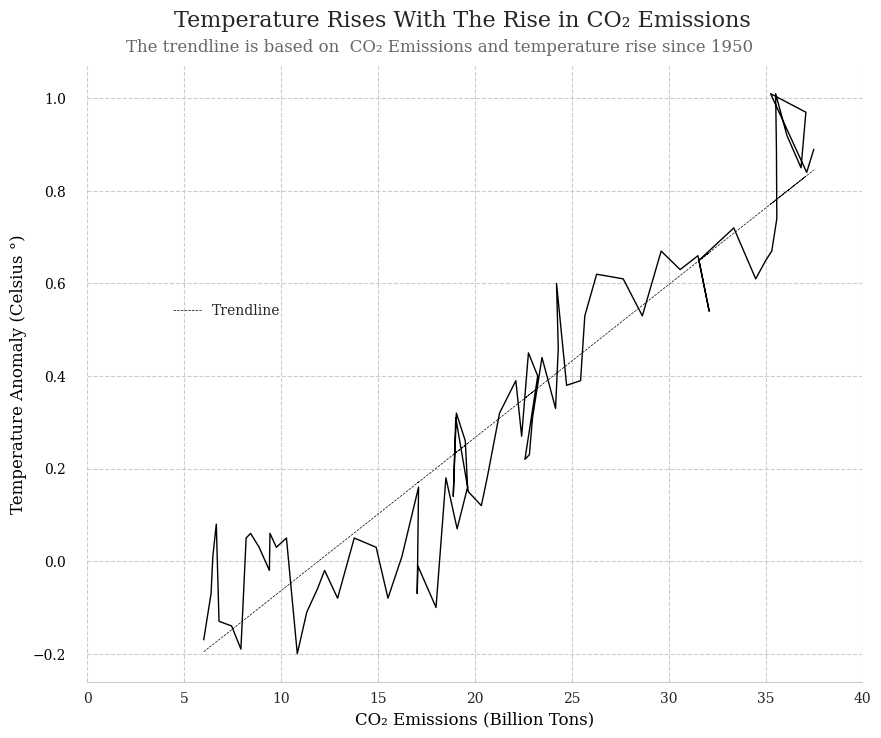

In [ ]:




fig, ax1 = plt.subplots(figsize=(10, 8))
#ax2 = ax1.twinx()
#sns.set_style("whitegrid", {'grid.linestyle': '--'})

ax1.plot(emm['btons'], tempe['Glob'], color='black', lw=1 )
#ax2.plot(hurricane['Year'], hurricane['Named Storms'], color='green', lw=2, label = 'Named Storms')
#ax2.plot(hurricane['Year'], hurricane['Hurricanes'], color='blue', alpha = 1,lw=2, label = 'Hurricanes')



#ax2.plot(co2['Year'], co2['btons'], color='black',alpha = 1, lw=2, label = u'CO\u2082 Emmision')
plt.xticks(font = 'serif')
plt.yticks(font= 'serif')

x = emm['btons']
y = tempe['Glob']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color = 'black', linestyle = 'dashed', linewidth = .5, label = 'Trendline')


ax1.set_ylabel("Temperature Anomaly (Celsius °)", color='black', fontsize=12, fontdict={'font':'serif'})
ax1.tick_params(axis="y", labelcolor='black', size = 12)
#ax1.set_ylim(-.2,1.1)
ax1.set_xlabel("CO\u2082 Emissions (Billion Tons)", color='black', fontsize=12, fontdict={'font':'serif'})
#ax2.tick_params(axis="y", labelcolor='black')
ax1.set_xlim(0,40)
fig.suptitle("Temperature Rises With The Rise in CO\u2082 Emissions", fontsize=16, font='serif', y = .95)
#fig.autofmt_xdate()
ax1.legend(bbox_to_anchor=(.265,.57),loc='lower right',prop={'size':10,'family':'serif'}, frameon=False)
#ax2.legend(bbox_to_anchor=(1.29,.4),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
sns.despine(left= True)

ax1.text(2,1.1,"The trendline is based on  CO\u2082 Emissions and temperature rise since 1950",
        fontdict={ 'size':12,'family':'serif'}, alpha = .7)
plt.savefig("Temperature Rises With The Rise in CO2 Emissions")
files.download("Temperature Rises With The Rise in CO2 Emissions.png")
plt.show()

In [ ]:
temp_final = temperature.merge(land_temp, how='left', on = 'Year')
temp_final = temp_final.merge(ocean_temp, how = 'left', on = 'Year')

In [ ]:
temp_final.head()

,Year,Glob,Abs,Anomaly,Temperature
0,1998-01-01,0.58,0.58,0.57,0.58
1,1999-01-01,0.49,1.07,0.79,0.36
2,2000-01-01,0.34,1.41,0.48,0.28
3,2001-01-01,0.44,1.85,0.62,0.35
4,2002-01-01,0.68,2.53,1.19,0.46


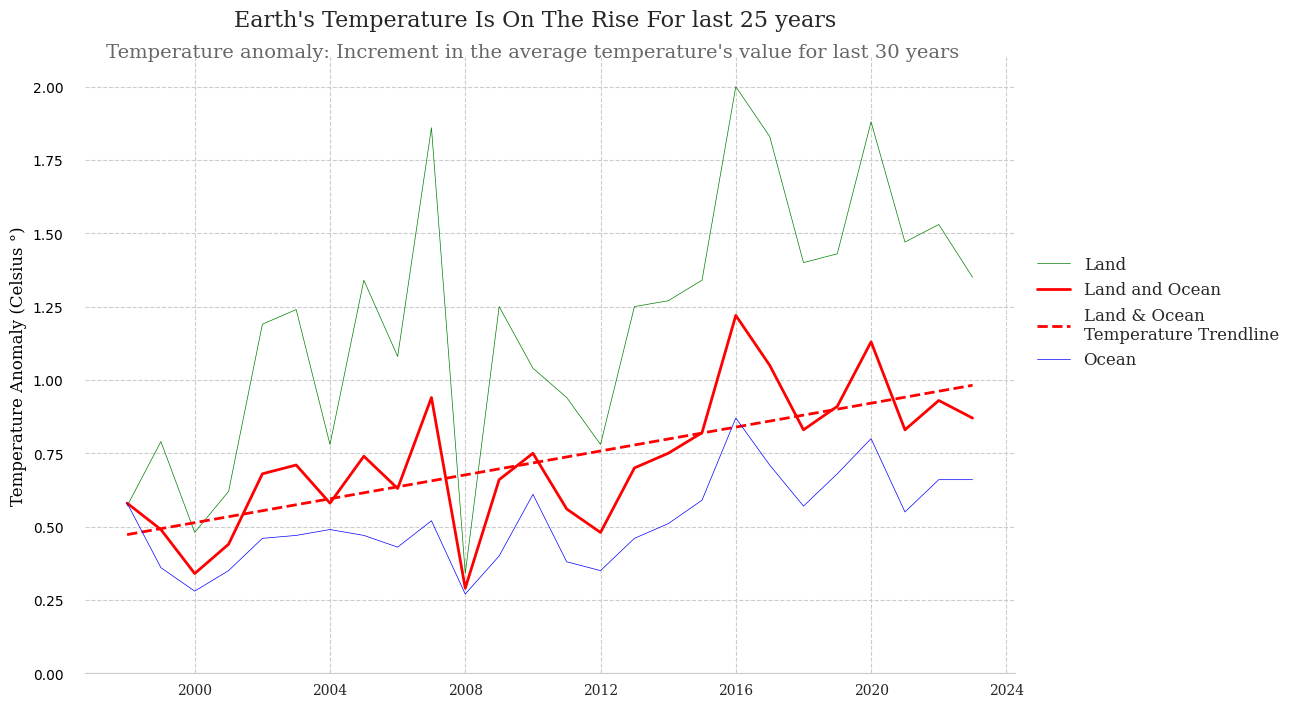

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 8))
#ax2 = ax1.twinx()
#sns.set_style("whitegrid", {'grid.linestyle': '--'})
ax1.plot(temp_final['Year'], temp_final['Anomaly'], color='green', lw=.5, label = 'Land')
ax1.plot(temp_final['Year'], temp_final['Glob'], color='red', lw=2, label = 'Land and Ocean')
#ax2.plot(hurricane['Year'], hurricane['Named Storms'], color='green', lw=2, label = 'Named Storms')
#ax2.plot(hurricane['Year'], hurricane['Hurricanes'], color='blue', alpha = 1,lw=2, label = 'Hurricanes')




#ax2.plot(co2['Year'], co2['btons'], color='black',alpha = 1, lw=2, label = u'CO\u2082 Emmision')
plt.xticks(font = 'serif')

x = temp_final['Year']
x_num = dates.date2num(x)
trend = np.polyfit(x_num, temp_final['Glob'], 1)
fit = np.poly1d(trend)
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "r--", label = 'Land & Ocean \nTemperature Trendline', lw = 2)

ax1.plot(temp_final['Year'], temp_final['Temperature'], color='blue', lw=.5, label = 'Ocean')

ax1.set_ylabel("Temperature Anomaly (Celsius °)", color='black', fontsize=12, fontdict={'font':'serif'})
ax1.tick_params(axis="y", labelcolor='black', size = 12)
ax1.set_ylim(0,2.1)
#ax2.set_ylabel("Carbon Emmision (Billion Tons)", color='black', fontsize=12, fontdict={'font':'serif'})
#ax2.tick_params(axis="y", labelcolor='black')
#ax2.set_ylim(0,55)
fig.suptitle("", fontsize=20)
#fig.autofmt_xdate()
ax1.legend(bbox_to_anchor=(1.3,.47),loc='lower right',prop={'size':12,'family':'serif'}, frameon=False)
#ax2.legend(bbox_to_anchor=(1.29,.4),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
sns.despine(left= True, right = True)
fig.suptitle("Earth's Temperature Is On The Rise For last 25 years", fontsize=16, font = 'serif', y = .94)
ax1.text(10000,2.1,"Temperature anomaly: Increment in the average temperature's value for last 30 years",
        fontdict={ 'size':14,'family':'serif'}, alpha = .7)

plt.savefig("Earth's Temperature Is On The Rise For last 25 years")
#files.download("Earth's Temperature Is On The Rise For last 25 years.png")

plt.show()

In [ ]:
glacier = pd.read_csv("https://raw.githubusercontent.com/Umerfarooq122/What-Is-The-Effect-Of-The-Earth-s-Temperature-on-Cyclonic-Storms-/main/glacier%20melting.csv")
glac_rec = glacier.loc[glacier['Year']>=1998]

In [ ]:
glac_rec['Year'] = pd.to_datetime(glac_rec.Year, format='%Y')


In [ ]:
glac_rec.head()

,Year,anb_tons,grb_ton
0,2002-01-01,0.00,0.00
1,2002-01-01,18.50,67.31
2,2002-01-01,-60.48,-220.59
3,2002-01-01,44.62,-243.74
4,2002-01-01,61.76,-210.68


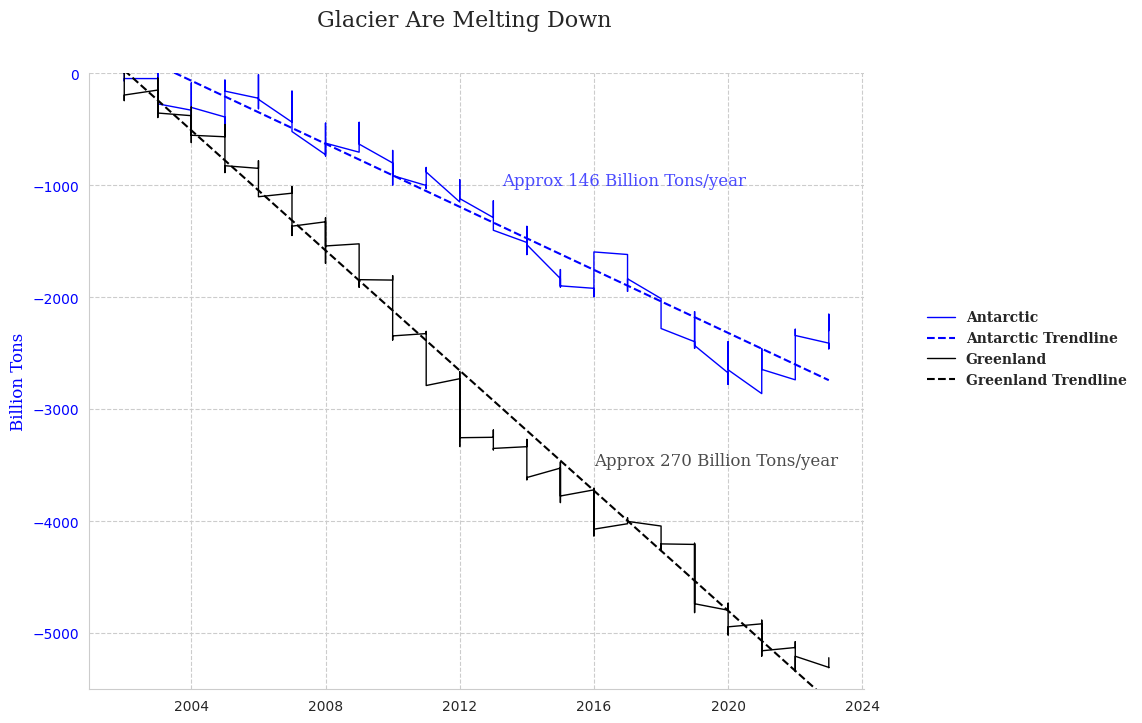

In [100]:
fig, ax1 = plt.subplots(figsize=(10, 8))
#ax2 = ax1.twinx()
#sns.set_style("whitegrid", {'grid.linestyle': '--'})


#ax2.plot(hurricane['Year'], hurricane['Named Storms'], color='green', lw=2, label = 'Named Storms')
ax1.plot(glac_rec['Year'], glac_rec['anb_tons'], color='blue', alpha = 1,lw=1, label = 'Antarctic')


x = glac_rec['Year']
x_num = dates.date2num(x)
trend = np.polyfit(x_num, glac_rec['anb_tons'], 1)
fit = np.poly1d(trend)
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "b--", label = 'Antarctic Trendline')

ax1.plot(glac_rec['Year'], glac_rec['grb_ton'], color='black', lw=1, label = 'Greenland')

x = glac_rec['Year']
x_num = dates.date2num(x)
trend = np.polyfit(x_num, glac_rec['grb_ton'], 1)
fit = np.poly1d(trend)
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "k--", label = 'Greenland Trendline')

#ax1.plot(temp_final['Year'], temp_final['Glob'], color='red',alpha = .3, lw=1, label = 'Land & Ocean Temperature')
#plt.xticks(font = 'serif')
'''
a = temp_final['Year']
a_num = dates.date2num(a)
trend = np.polyfit(a_num, temp_final['Glob'], 1)
fit = np.poly1d(trend)
x_fit = np.linspace(a_num.min(), a_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "r--", label = 'Temperature Trendline')
'''
#ax1.set_ylabel("Temperature Anamoly", color='red', fontsize=12, fontdict={'font':'serif'})
#ax1.tick_params(axis="y", labelcolor='red', size = 12)
#ax1.set_ylim(0,1.1)
#ax1.set_xlim(11000,20000)
ax1.set_ylabel("Billion Tons", color='blue', fontsize=12, fontdict={'font':'serif'})
ax1.tick_params(axis="y", labelcolor='blue')
ax1.set_ylim(-5500,0)
fig.suptitle("", fontsize=20)
#fig.autofmt_xdate()
#ax1.legend(bbox_to_anchor=(1.3,.435),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
ax1.legend(bbox_to_anchor=(1.355,.47),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
sns.despine(bottom = False, left = False)
fig.suptitle("Glacier Are Melting Down", fontsize=16, font = 'serif', y = .96)
#ax1.text(9900,-5500,"The Hurricane trendline suggests a slight increase in the number of hurricanes with \nincrease in the ocean temperature",
       # fontdict={ 'size':12,'family':'serif'}, alpha = .7)
ax1.text(15800,-1000,"Approx 146 Billion Tons/year",
      fontdict={ 'size':12,'family':'serif'}, alpha = .7, color= 'blue')
ax1.text(16800,-3500,"Approx 270 Billion Tons/year",
        fontdict={ 'size':12,'family':'serif'}, alpha = .7, color = 'black')
plt.show()

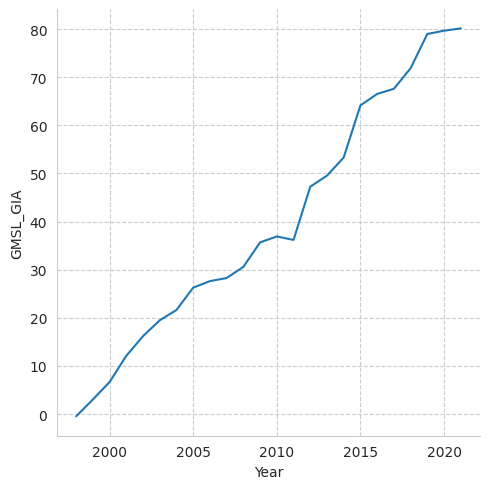

In [ ]:
sns.relplot(data =b, x = 'Year', y = 'GMSL_GIA', kind='line')

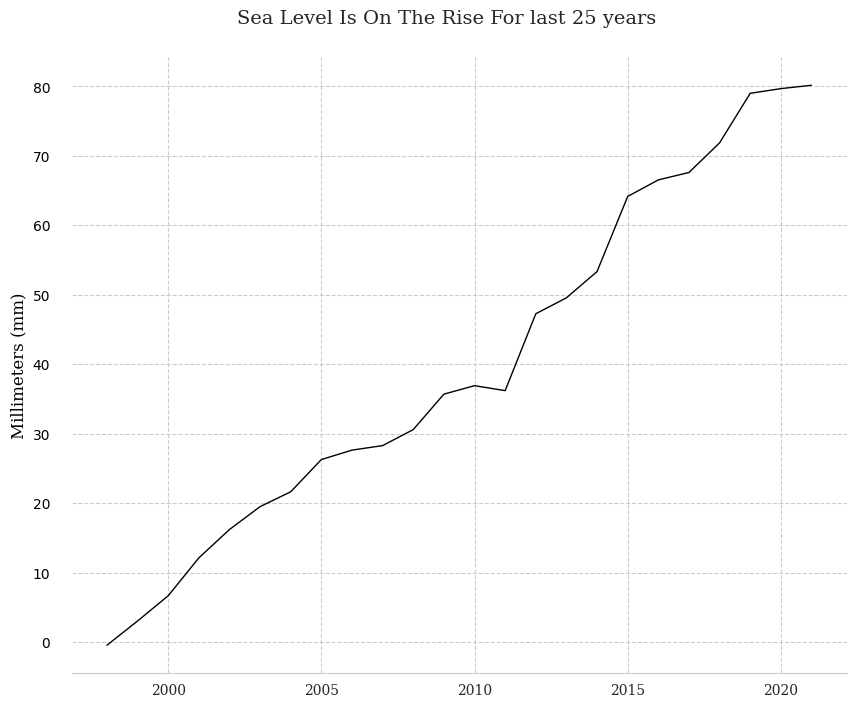

In [ ]:
fig, ax1 = plt.subplots(figsize = (10,8))
#ax2 = ax1.twinx()
#sns.set_style("whitegrid", {'grid.linestyle': '--'})
ax1.plot(b['Year'], b['GMSL_GIA'], color='black', lw=1)






#ax2.plot(co2['Year'], co2['btons'], color='black',alpha = 1, lw=2, label = u'CO\u2082 Emmision')
plt.xticks(font = 'serif')





ax1.set_ylabel("Millimeters (mm)", color='black', fontsize=12, fontdict={'font':'serif'})
ax1.tick_params(axis="y", labelcolor='black', size = 12)
#ax1.set_ylim(0,2.1)
#ax2.set_ylabel("Carbon Emmision (Billion Tons)", color='black', fontsize=12, fontdict={'font':'serif'})
#ax2.tick_params(axis="y", labelcolor='black')
#ax2.set_ylim(0,55)
fig.suptitle("", fontsize=20)
#fig.autofmt_xdate()

#ax2.legend(bbox_to_anchor=(1.29,.4),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
sns.despine(left= True, right = True)
fig.suptitle("Sea Level Is On The Rise For last 25 years", fontsize=14, font = 'serif', y = .94)
#ax1.text(10,90,"With melting glaciers, the sea level is on the rise",
      #  fontdict={ 'size':14,'family':'serif'}, alpha = .7)

plt.savefig("Earth's Temperature Is On The Rise For last 25 years")
#files.download("Earth's Temperature Is On The Rise For last 25 years.png")

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

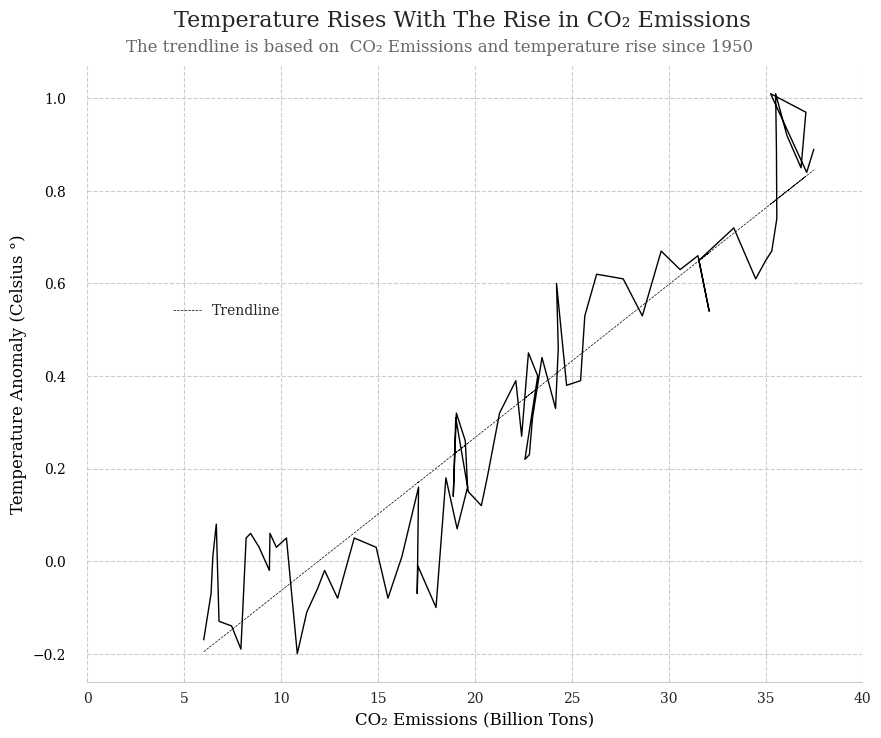

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 8))
#ax2 = ax1.twinx()
#sns.set_style("whitegrid", {'grid.linestyle': '--'})

ax1.plot(emm['btons'], tempe['Glob'], color='black', lw=1 )
#ax2.plot(hurricane['Year'], hurricane['Named Storms'], color='green', lw=2, label = 'Named Storms')
#ax2.plot(hurricane['Year'], hurricane['Hurricanes'], color='blue', alpha = 1,lw=2, label = 'Hurricanes')



#ax2.plot(co2['Year'], co2['btons'], color='black',alpha = 1, lw=2, label = u'CO\u2082 Emmision')
plt.xticks(font = 'serif')
plt.yticks(font= 'serif')

x = emm['btons']
y = tempe['Glob']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color = 'black', linestyle = 'dashed', linewidth = .5, label = 'Trendline')


ax1.set_ylabel("Temperature Anomaly (Celsius °)", color='black', fontsize=12, fontdict={'font':'serif'})
ax1.tick_params(axis="y", labelcolor='black', size = 12)
#ax1.set_ylim(-.2,1.1)
ax1.set_xlabel("CO\u2082 Emissions (Billion Tons)", color='black', fontsize=12, fontdict={'font':'serif'})
#ax2.tick_params(axis="y", labelcolor='black')
ax1.set_xlim(0,40)
fig.suptitle("Temperature Rises With The Rise in CO\u2082 Emissions", fontsize=16, font='serif', y = .95)
#fig.autofmt_xdate()
ax1.legend(bbox_to_anchor=(.265,.57),loc='lower right',prop={'size':10,'family':'serif'}, frameon=False)
#ax2.legend(bbox_to_anchor=(1.29,.4),loc='lower right',prop={'weight':'bold','size':10,'family':'serif'}, frameon=False)
sns.despine(left= True)

ax1.text(2,1.1,"The trendline is based on  CO\u2082 Emissions and temperature rise since 1950",
        fontdict={ 'size':12,'family':'serif'}, alpha = .7)
plt.savefig("Temperature Rises With The Rise in CO2 Emissions")
files.download("Temperature Rises With The Rise in CO2 Emissions.png")
plt.show()

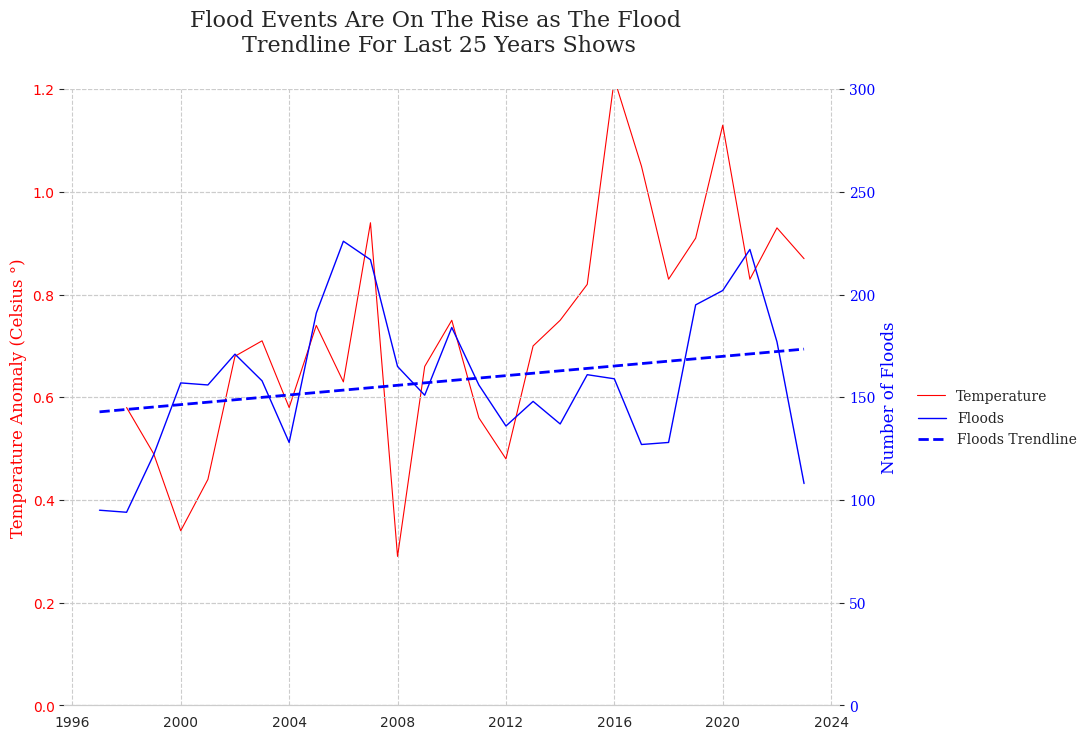

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 8))
ax2 = ax1.twinx()
sns.set_style("whitegrid", {'grid.linestyle': '--'})

ax1.plot(temperature['Year'], temperature['Glob'], color='red', lw=.8, label = 'Temperature')
ax2.plot(flood_count['Year'], flood_count['counts'], color='blue', lw=1, label = 'Floods')


ax1.set_ylabel("Temperature Anomaly (Celsius °)", color='red', fontsize=12, font = 'serif')
ax1.tick_params(axis="y", labelcolor='red')

ax1.set_ylim(0,1.2)
ax2.set_ylabel("Number of Floods", color='blue', fontsize=12, font = 'serif')
ax2.tick_params(axis="y", labelcolor='blue')
ax2.set_ylim(0,300)

x = flood_count['Year']
x_num = dates.date2num(x)
trend = np.polyfit(x_num, flood_count['counts'], 1)
fit = np.poly1d(trend)
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "b--", label = 'Floods Trendline', lw = 2)


fig.suptitle("Flood Events Are On The Rise as The Flood \nTrendline For Last 25 Years Shows", fontsize=16, font = 'serif')
#fig.autofmt_xdate()
sns.despine(left= True, right = True)
plt.xticks(font = 'serif')
plt.yticks(font= 'serif')
ax1.legend(bbox_to_anchor=(1.285,.47),loc='lower right',prop={'size':10,'family':'serif'}, frameon=False)
ax2.legend(bbox_to_anchor=(1.323,.4),loc='lower right',prop={'size':10,'family':'serif'}, frameon=False)

plt.show()